<a href="https://colab.research.google.com/github/YOUNGKIM1234/ML_practice/blob/master/1-4%20Overfitting%20and%20underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

17465344/17464789 [==============================] - 0s 0us/step


In [0]:

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.0026 - acc: 1.0000 - binary_crossentropy: 0.0026 - val_loss: 0.8422 - val_acc: 0.8557 - val_binary_crossentropy: 0.8422
Epoch 2/20
 - 4s - loss: 0.0023 - acc: 1.0000 - binary_crossentropy: 0.0023 - val_loss: 0.8594 - val_acc: 0.8554 - val_binary_crossentropy: 0.8594
Epoch 3/20
 - 4s - loss: 0.0020 - acc: 1.0000 - binary_crossentropy: 0.0020 - val_loss: 0.8747 - val_acc: 0.8548 - val_binary_crossentropy: 0.8747
Epoch 4/20
 - 4s - loss: 0.0018 - acc: 1.0000 - binary_crossentropy: 0.0018 - val_loss: 0.8883 - val_acc: 0.8550 - val_binary_crossentropy: 0.8883
Epoch 5/20
 - 4s - loss: 0.0016 - acc: 1.0000 - binary_crossentropy: 0.0016 - val_loss: 0.9042 - val_acc: 0.8553 - val_binary_crossentropy: 0.9042
Epoch 6/20
 - 4s - loss: 0.0014 - acc: 1.0000 - binary_crossentropy: 0.0014 - val_loss: 0.9215 - val_acc: 0.8549 - val_binary_crossentropy: 0.9215
Epoch 7/20
 - 4s - loss: 0.0012 - acc: 1.0000 - binary_crossentropy:

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6263 - acc: 0.6403 - binary_crossentropy: 0.6263 - val_loss: 0.5673 - val_acc: 0.7548 - val_binary_crossentropy: 0.5673
Epoch 2/20
 - 4s - loss: 0.5184 - acc: 0.8156 - binary_crossentropy: 0.5184 - val_loss: 0.5067 - val_acc: 0.8376 - val_binary_crossentropy: 0.5067
Epoch 3/20
 - 4s - loss: 0.4623 - acc: 0.8714 - binary_crossentropy: 0.4623 - val_loss: 0.4734 - val_acc: 0.8564 - val_binary_crossentropy: 0.4734
Epoch 4/20
 - 4s - loss: 0.4237 - acc: 0.9028 - binary_crossentropy: 0.4237 - val_loss: 0.4534 - val_acc: 0.8664 - val_binary_crossentropy: 0.4534
Epoch 5/20
 - 4s - loss: 0.3942 - acc: 0.9206 - binary_crossentropy: 0.3942 - val_loss: 0.4453 - val_acc: 0.8597 - val_binary_crossentropy: 0.4453
Epoch 6/20
 - 4s - loss: 0.3695 - acc: 0.9349 - binary_crossentropy: 0.3695 - val_loss: 0.4348 - val_acc: 0.8680 - val_binary_crossentropy: 0.4348
Epoch 7/20
 - 4s - loss: 0.3481 - acc: 0.9448 - binary_crossentropy:

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 20s - loss: 0.3511 - acc: 0.8532 - binary_crossentropy: 0.3511 - val_loss: 0.3134 - val_acc: 0.8723 - val_binary_crossentropy: 0.3134
Epoch 2/20
 - 19s - loss: 0.1409 - acc: 0.9484 - binary_crossentropy: 0.1409 - val_loss: 0.3578 - val_acc: 0.8638 - val_binary_crossentropy: 0.3578
Epoch 3/20
 - 19s - loss: 0.0483 - acc: 0.9863 - binary_crossentropy: 0.0483 - val_loss: 0.4185 - val_acc: 0.8702 - val_binary_crossentropy: 0.4185
Epoch 4/20
 - 19s - loss: 0.0084 - acc: 0.9987 - binary_crossentropy: 0.0084 - val_loss: 0.5662 - val_acc: 0.8700 - val_binary_crossentropy: 0.5662
Epoch 5/20
 - 19s - loss: 0.0014 - acc: 1.0000 - binary_crossentropy: 0.0014 - val_loss: 0.6668 - val_acc: 0.8711 - val_binary_crossentropy: 0.6668
Epoch 6/20
 - 19s - loss: 2.6328e-04 - acc: 1.0000 - binary_crossentropy: 2.6328e-04 - val_loss: 0.7126 - val_acc: 0.8715 - val_binary_crossentropy: 0.7126
Epoch 7/20
 - 19s - loss: 1.4855e-04 - acc: 1.0000 - b

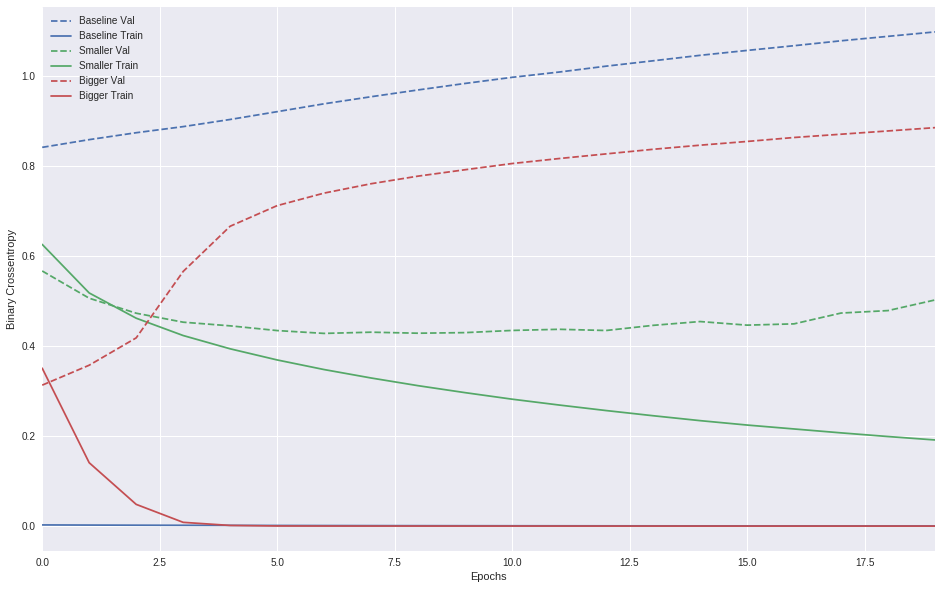

In [14]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [0]:
# smaller 과 bigger의 차이점 : normal과 비교
# smaller : 장. 걸리는 시간이 빠르다. / 단. 정확도가 낮다.
# bigger : 장. 정확도가 높다. / 단. 설리는 시간이 길다.
# 나눈 기준 : model의 dense layer를 통과한 후 나오는 output layer의 크기에 따라. 